In [67]:
import numpy as np
import commands

In [68]:
import sys # needed to import cat_utils
sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/')

In [69]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [70]:
import imp
import cat_utils
imp.reload(cat_utils)

<module 'cat_utils' from '/Users/abrahamn/21cmIR/21cmIRxcor/cat_utils.pyc'>

In [71]:
# LOAD MWA CATALOG

mwa_cat = cat_utils.MWACatalog('mwa_calibration_source_list.sav')

In [48]:
# LOAD IR CATALOGS OVER 10deg FOV centered at (RA,Dec)=(0,-27deg)

raw_frames_path = '/Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/'
analysis_root = '/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/'
labels = '02a57694o0326I 02a57694o0368I 02a57694o0323I 02a57694o0365I'.split()
ir_cats_dph = [cat_utils.IRCatalog(raw_frames_path+l+'.dph',\
                             fits_path=analysis_root+'/'+l+'/'+l+'_5degframecentered.fits') for l in labels]
ir_cats_se = [cat_utils.IRCatalog(se_path=analysis_root+'field'+str(i)+'/field'+str(i)+'.sex',\
                             fits_path=analysis_root+'/field'+str(i)+'/field'+str(i)+'.fits') for i in range(4)]
ir_cats = ir_cats_se

loading /Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/02a57694o0326I.dph
identifying and excluding artifacts (ie, saturated pixels)
loading /Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/02a57694o0368I.dph
identifying and excluding artifacts (ie, saturated pixels)
loading /Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/02a57694o0323I.dph
identifying and excluding artifacts (ie, saturated pixels)
loading /Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/02a57694o0365I.dph
identifying and excluding artifacts (ie, saturated pixels)


loading/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/field0/field0.sex
identifying and excluding artifacts (ie, saturated pixels)
loading/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/field1/field1.sex
identifying and excluding artifacts (ie, saturated pixels)
loading/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/field2/field2.sex
identifying and excluding artifacts (ie, saturated pixels)
loading/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/field3/field3.sex
identifying and excluding artifacts (ie, saturated pixels)


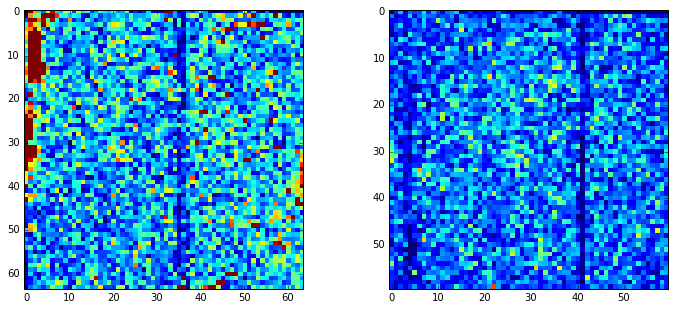

In [53]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(cat_utils.cat2img(ir_cats_dph[0],bound_cat=ir_cats_dph[0],dtheta=dtheta_deg,jymin=0,jymax=.001),interpolation='nearest',\
          vmin=0,vmax=.01)

plt.subplot(122)
plt.imshow(cat_utils.cat2img(ir_cats_se[0],bound_cat=ir_cats_se[0],dtheta=dtheta_deg,jymin=0,jymax=.001),interpolation='nearest',\
          vmin=.0,vmax=.01)

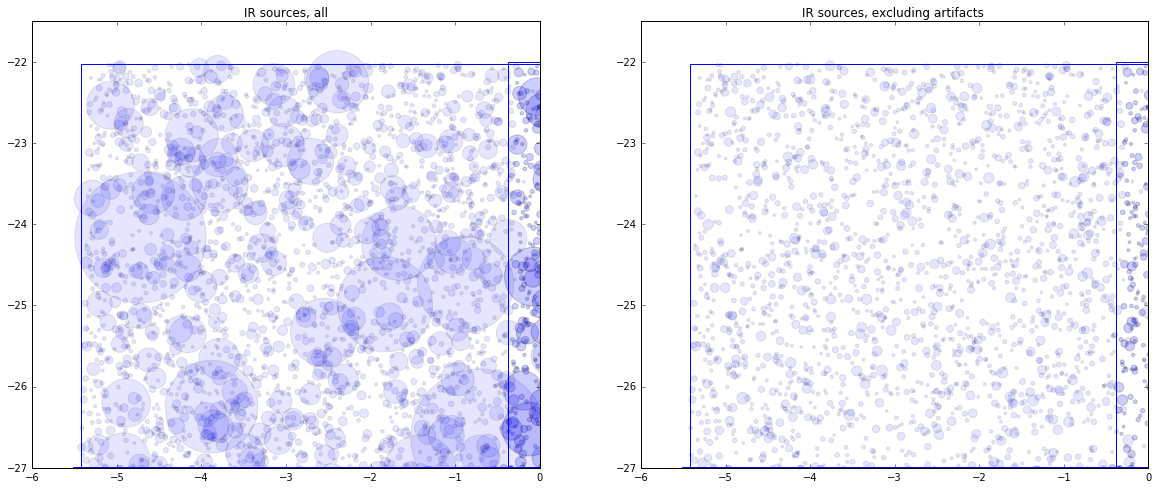

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(121)
cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4,exclude_artifacts=False)
plt.ylim([-27,-21.5])
plt.xlim([-6,0])
plt.title('IR sources, all')

plt.subplot(122)
cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4,exclude_artifacts=True)
plt.ylim([-27,-21.5])
plt.xlim([-6,0])
plt.title('IR sources, excluding artifacts ')

(-34, -20)

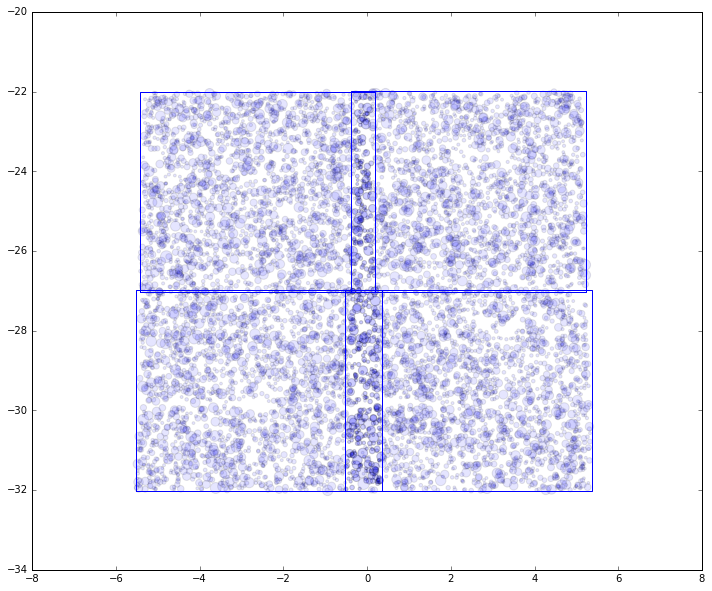

In [21]:
plt.figure(figsize=(12,10))
cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4)
plt.xlim([-8,8])
plt.ylim([-34,-20])

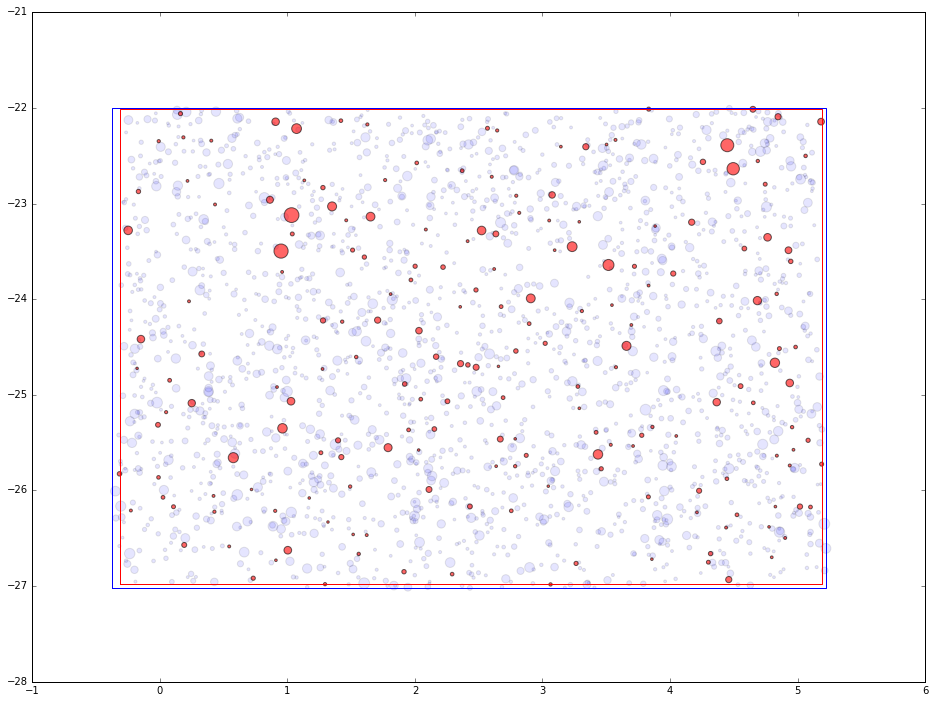

In [26]:
plt.figure(figsize=(16,12))
mwa_cat_ir0 = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(ir_cats[1])
cat_utils.plot_cat_list(plt,[ir_cats[1],mwa_cat_ir0],[500,60],['b','r'],jymin_vals=[.015,0],alpha_vals=[.1,.6])
# plt.xlim([-8,8])
# plt.ylim([-34,-20])

(30, 31)
(30, 31)


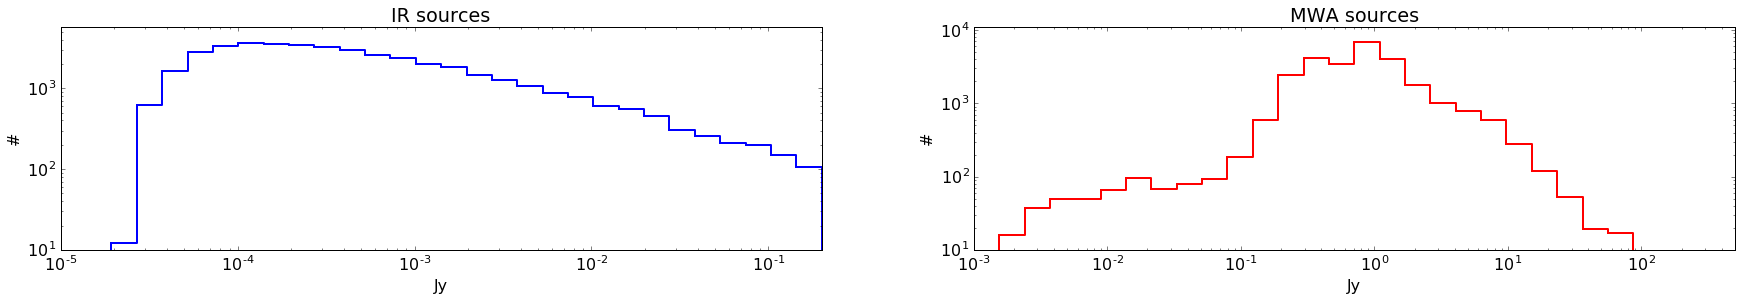

In [29]:
matplotlib.rcParams.update({'font.size': 16})

plt.figure(figsize=(30,4))
plt.subplot(121)
cat_utils.logloghist(plt,ir_cats[0].jy[ir_cats[0].jy<5],.00001,.2,30,'b')
plt.xlim([.00001,.2])
plt.title('IR sources')
plt.xlabel('Jy')
plt.ylabel('#')
plt.yscale('log', nonposy='clip')

plt.subplot(122)
cat_utils.logloghist(plt,mwa_cat.jy[mwa_cat.jy<500],.001,500,30,'r')
plt.xlim([.001,500])
#plt.xlim([0,10])
plt.title('MWA sources')
plt.xlabel('Jy')
plt.ylabel('#')
plt.yscale('log', nonposy='clip')

In [233]:
# plt.figure(figsize=(14,6))

# plt.subplot(121)
# plt.imshow(ir_img,interpolation='nearest')
# plt.colorbar()

# plt.subplot(122)
# plt.imshow(mwa_img,interpolation='nearest')
# plt.colorbar()

In [31]:
nbins = 10
lmax = 3000
dtheta_deg = 5./60 # 5arcmin
num_ir_fields = 4

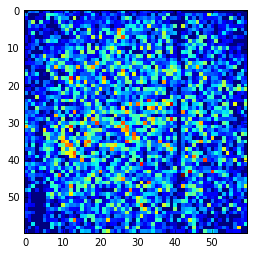

[0, 0.2, 0, 100]
[0, 0.01, 0, 100]
[0, 0.001, 0, 100]
[0, 0.0001, 0, 100]
[0, 5e-05, 0, 100]
[0, 0.2, 0, 10]
[0, 0.01, 0, 10]
[0, 0.001, 0, 10]
[0, 0.0001, 0, 10]
[0, 5e-05, 0, 10]
[0, 0.2, 0, 1]
[0, 0.01, 0, 1]
[0, 0.001, 0, 1]
[0, 0.0001, 0, 1]
[0, 5e-05, 0, 1]
[0, 0.2, 0, 0.1]
[0, 0.01, 0, 0.1]
[0, 0.001, 0, 0.1]
[0, 0.0001, 0, 0.1]
[0, 5e-05, 0, 0.1]


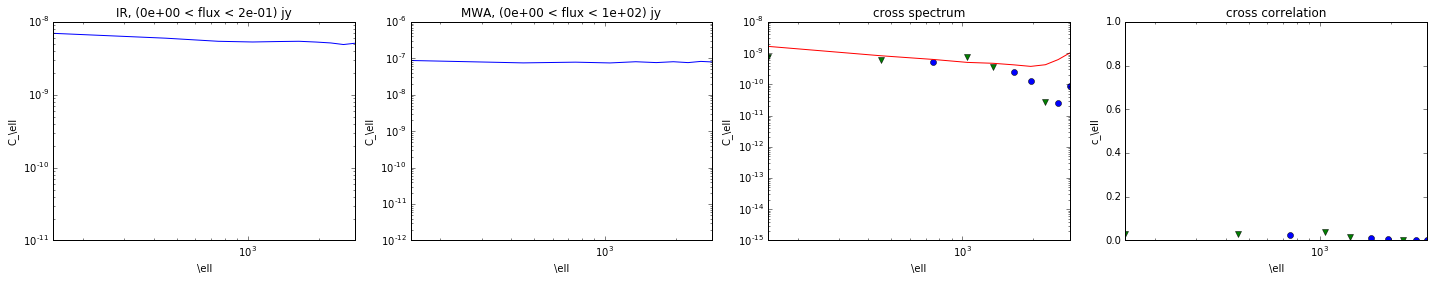

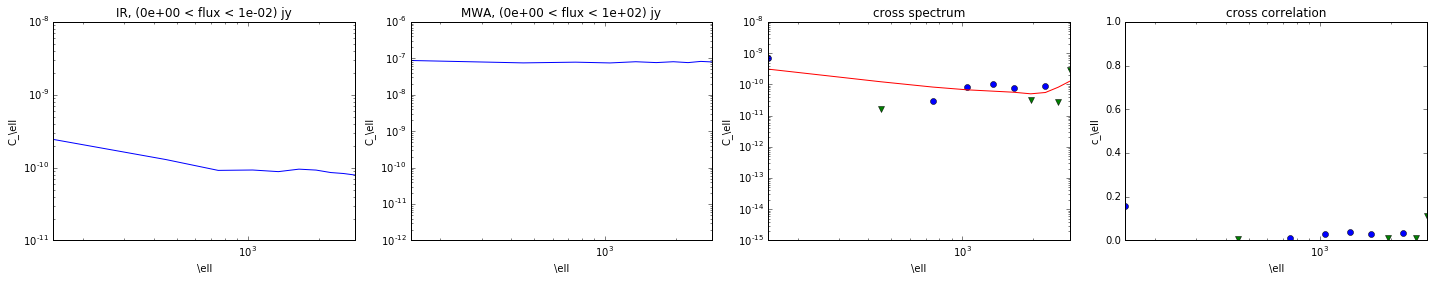

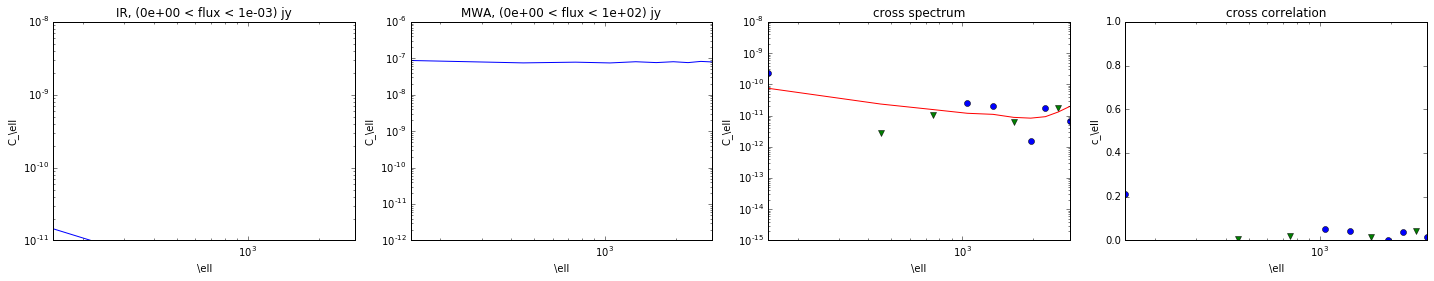

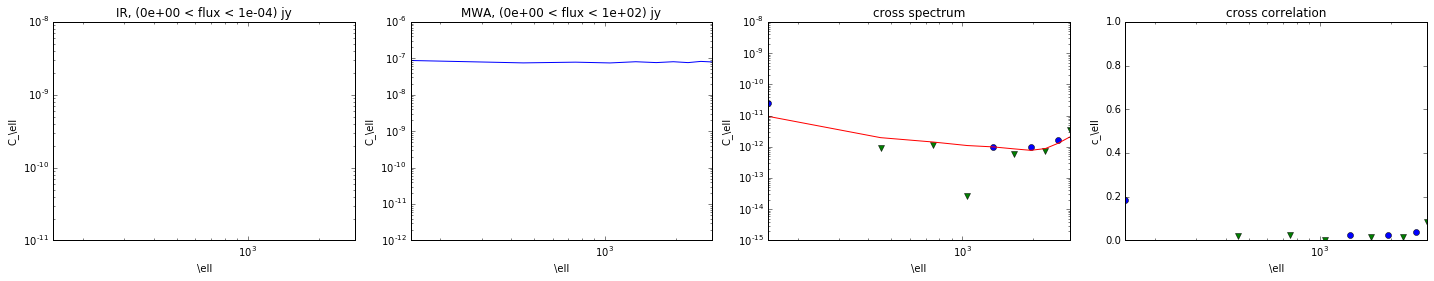

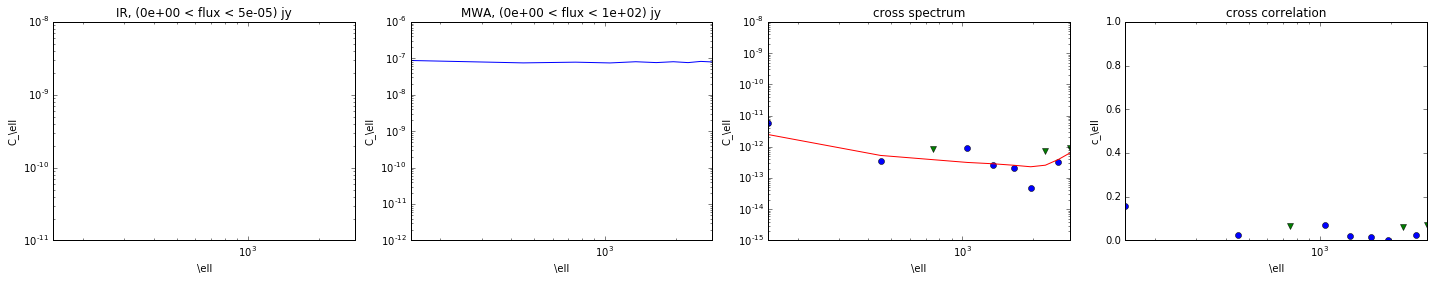

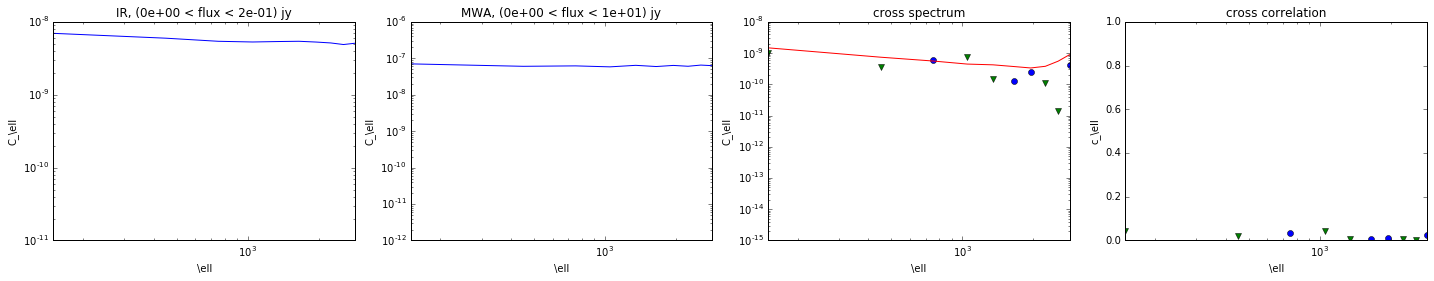

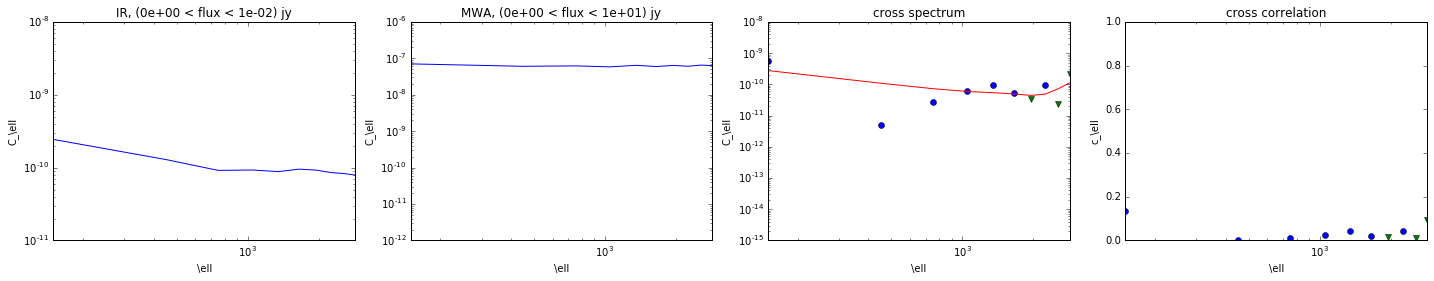

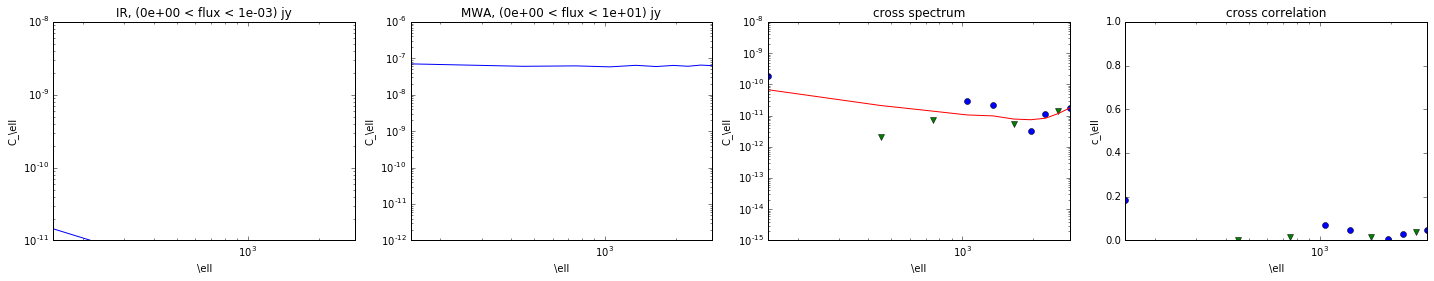

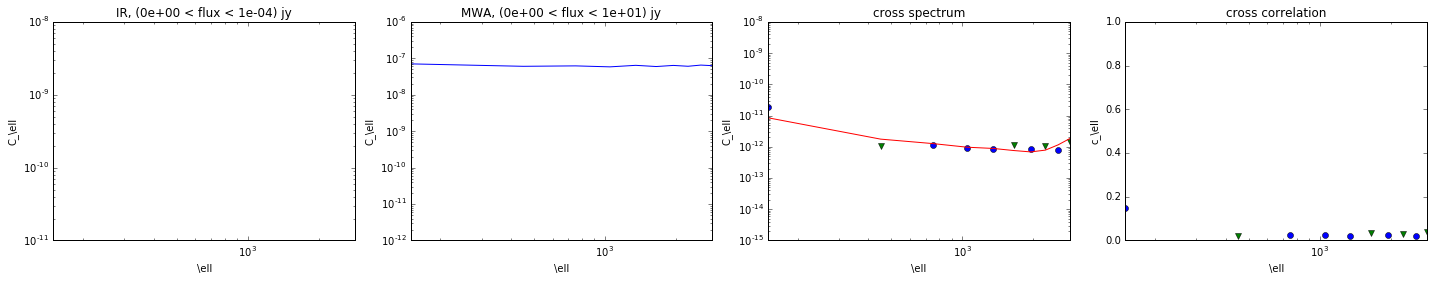

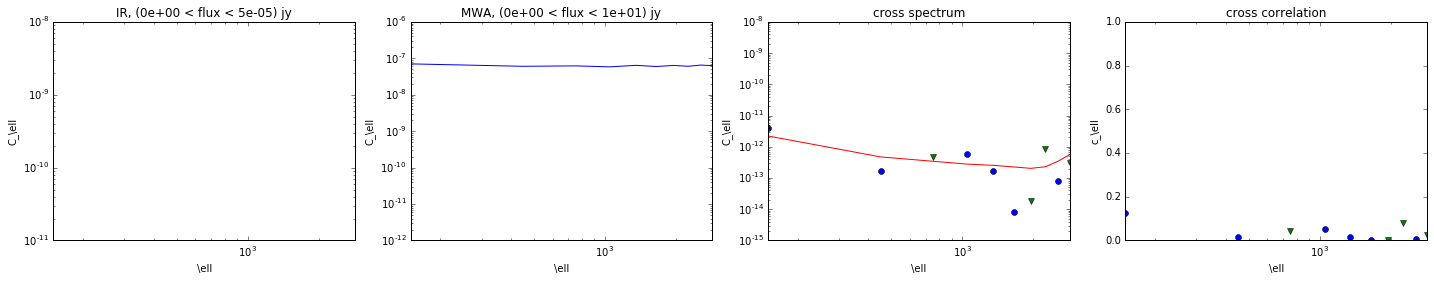

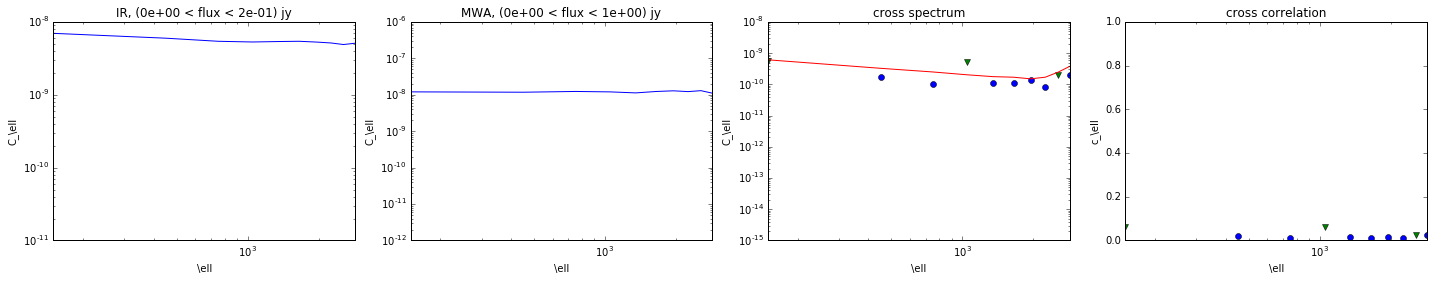

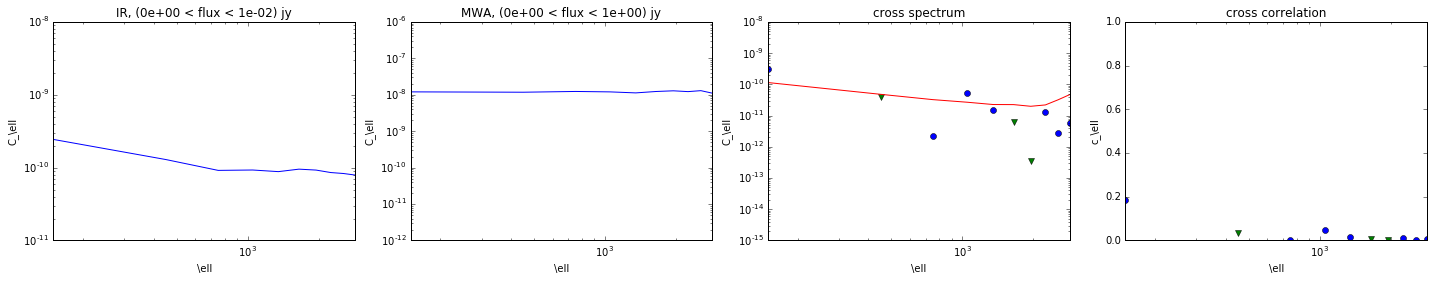

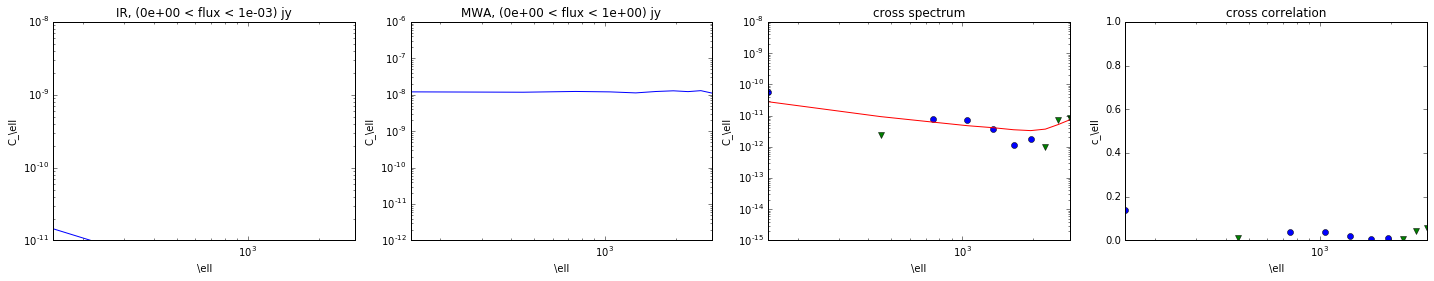

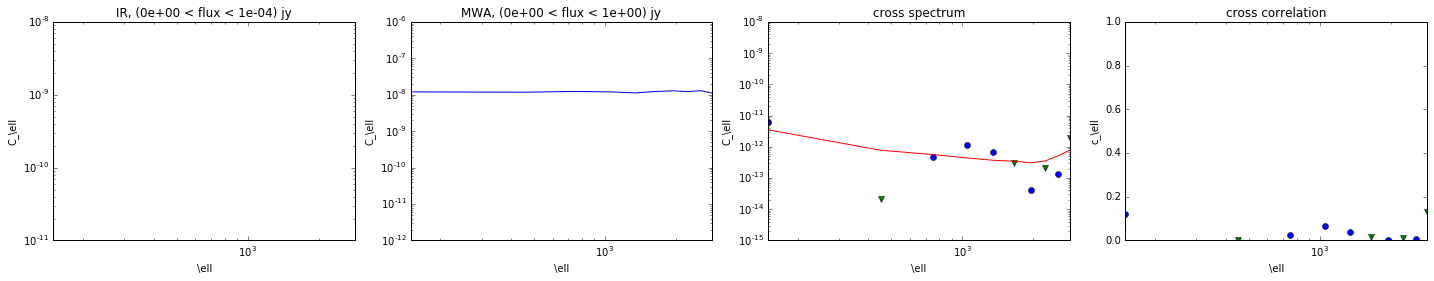

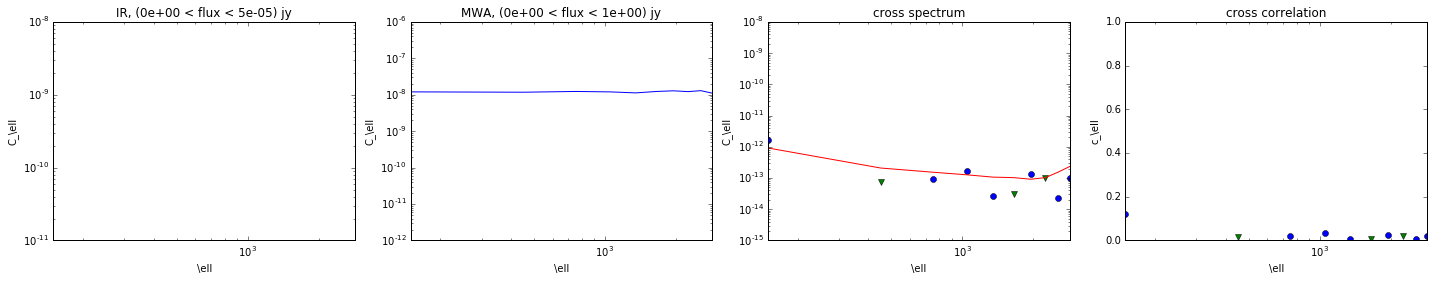

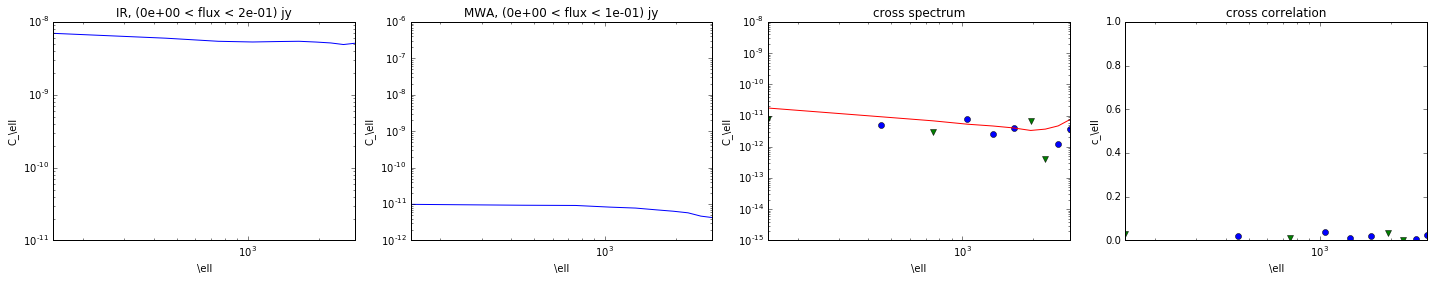

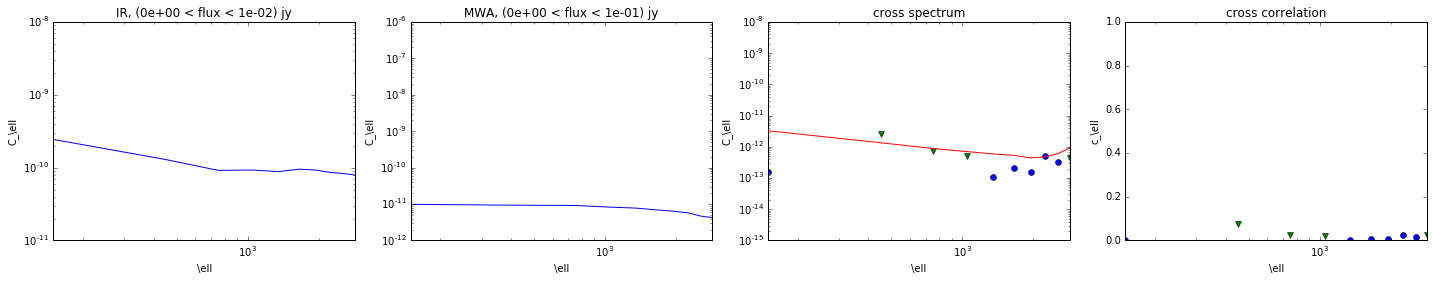

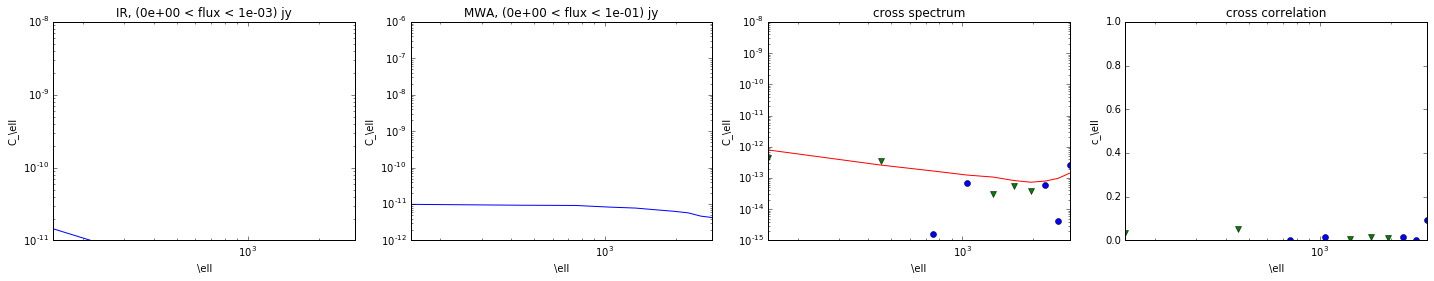

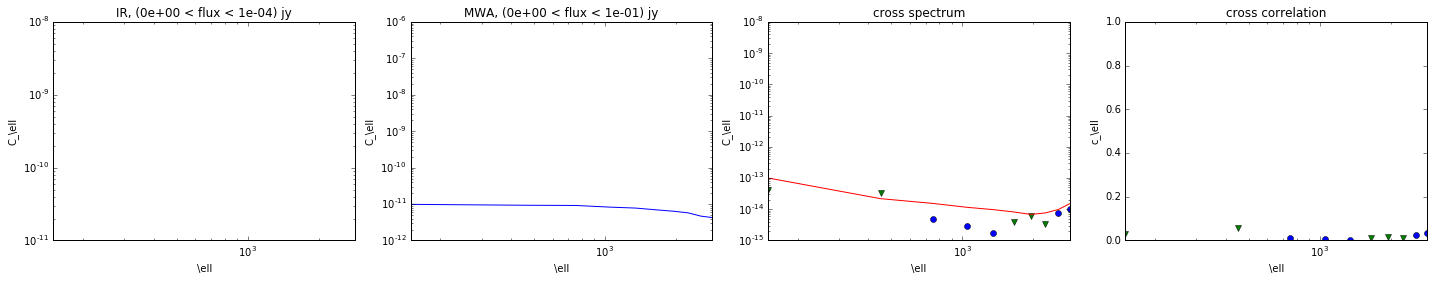

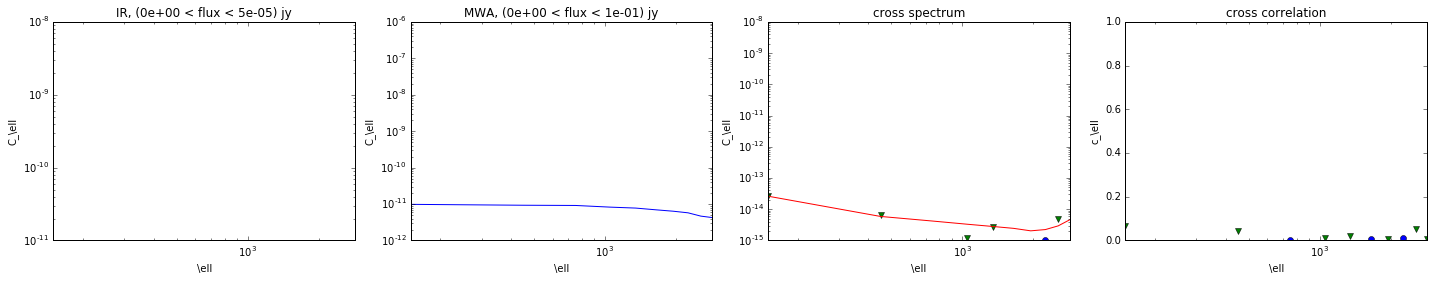

In [41]:
ir_mwa_jymin_max_vals = [
[0,2.e-1,0,100],
[0,1.e-2,0,100],
[0,1.e-3,0,100],
[0,1.e-4,0,100],
[0,.5e-4,0,100],
[0,2.e-1,0,10],
[0,1.e-2,0,10],
[0,1.e-3,0,10],
[0,1.e-4,0,10],
[0,.5e-4,0,10],
[0,2.e-1,0,1],
[0,1.e-2,0,1],
[0,1.e-3,0,1],
[0,1.e-4,0,1],
[0,.5e-4,0,1],
[0,2.e-1,0,.1],
[0,1.e-2,0,.1],
[0,1.e-3,0,.1],
[0,1.e-4,0,.1],
[0,.5e-4,0,.1],
]

for paramseti in range(len(ir_mwa_jymin_max_vals)):
    print(ir_mwa_jymin_max_vals[paramseti])
    ir_jymin,ir_jymax,mwa_jymin,mwa_jymax = ir_mwa_jymin_max_vals[paramseti]

    pspec1 = np.zeros(nbins)
    pspec2 = np.zeros(nbins)
    xspec = np.zeros(nbins)
    bin_counts = np.zeros(nbins)
    for fieldi in range(num_ir_fields):
        ir_img = cat_utils.cat2img(ir_cats[fieldi],bound_cat=ir_cats[fieldi],dtheta=dtheta_deg,jymin=ir_jymin,jymax=ir_jymax)
        mwa_cat_ir0 = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(ir_cats[fieldi])
        mwa_img = cat_utils.cat2img(mwa_cat_ir0,bound_cat=ir_cats[fieldi],dtheta=dtheta_deg,jymin=mwa_jymin,jymax=mwa_jymax)

        lbins,pspec1_field,pspec2_field,xspec_field,bin_counts_field = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax)
        pspec1 += pspec1_field/num_ir_fields
        pspec2 += pspec2_field/num_ir_fields
        xspec += xspec_field/num_ir_fields
        bin_counts += bin_counts_field
        
    cat_utils.plot_spectra(plt,lbins,pspec1,pspec2,xspec,bin_counts,ir_mwa_jymin_max_vals[paramseti])

# what about comparing MWA sources to far IR (akari) sources?

In [72]:
import pyfits
#hdulist = pyfits.open('/Volumes/abraham/xcor_data/far_ir_catalogs/AKARI-FIS_BSC_V1.fits')
hdulist = pyfits.open('/Users/abrahamn/Downloads/AKARI-FIS_BSC_V1.fits.txt')
he = hdulist[1].header
akaridat = hdulist[1].data
ra = akaridat['ra']
ra[ra>180] -= 360.
dec = akaridat['dec']
flux90 = akaridat['flux65']
mwamask = (ra > -10)&(ra < 10)&(dec > -37)&(dec < -17)&np.logical_not(np.isnan(flux90))

In [73]:
he

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.6a           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  120 /Number of bytes per row                         
NAXIS2  =               427071 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   36 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'FIS_BSC '           / Extention Name                                 
COMMENT                     

In [74]:
akaridat.names

['OBJID',
 'OBJNAME',
 'RA',
 'DEC',
 'POSERRMJ',
 'POSERRMI',
 'POSERRPA',
 'FLUX65',
 'FLUX90',
 'FLUX140',
 'FLUX160',
 'FERR65',
 'FERR90',
 'FERR140',
 'FERR160',
 'FQUAL65',
 'FQUAL90',
 'FQUAL140',
 'FQUAL160',
 'FLAGS65',
 'FLAGS90',
 'FLAGS140',
 'FLAGS160',
 'NSCANC65',
 'NSCANC90',
 'NSCANC140',
 'NSCANC160',
 'NSCANP65',
 'NSCANP90',
 'NSCANP140',
 'NSCANP160',
 'MCONF65',
 'MCONF90',
 'MCONF140',
 'MCONF160',
 'NDENS']

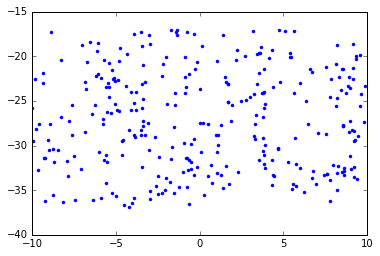

In [75]:
plt.plot(ra[mwamask],dec[mwamask],'.')

In [76]:
akaricat = cat_utils.Catalog(ra[mwamask],dec[mwamask],flux90[mwamask])
mwa_cat_akari = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(akaricat)

(50, 51)


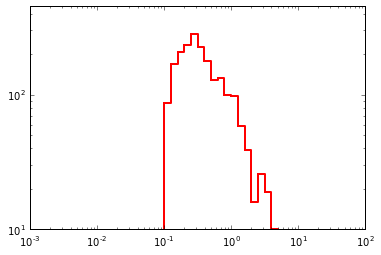

In [84]:
cat_utils.logloghist(plt,mwa_cat_akari.jy,1.e-3,1.e2,50,'r')
plt.xlabel('Jy')
plt.ylabel('#')
plt.title('Patti''MWA catalog histogram (mwa_calibration_source_list)\n limited to EOR0 field')

In [66]:
len(akaricat.ra)

307

(array([ 16.,  16.,  12.,   9.,  11.,   7.,  14.,   8.,  22.,   9.,  17.,
         12.,  11.,  18.,  13.,   9.,  17.,   4.,   8.,   7.,   7.,   3.,
          3.,   4.,   2.,   4.,   1.,   1.,   3.,   0.,   2.,   6.,   3.,
          2.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   2.,
          0.,   1.,   1.,   2.,   0.,   1.]),
 array([  9.19874117e-04,   3.96435516e-02,   7.83672291e-02,
          1.17090907e-01,   1.55814584e-01,   1.94538262e-01,
          2.33261939e-01,   2.71985617e-01,   3.10709294e-01,
          3.49432971e-01,   3.88156649e-01,   4.26880326e-01,
          4.65604004e-01,   5.04327681e-01,   5.43051359e-01,
          5.81775036e-01,   6.20498714e-01,   6.59222391e-01,
          6.97946069e-01,   7.36669746e-01,   7.75393424e-01,
          8.14117101e-01,   8.52840779e-01,   8.91564456e-01,
          9.30288134e-01,   9.69011811e-01,   1.00773549e+00,
          1.04645917e+00,   1.08518284e+00,   1.12390652e+00,
          1.16263020e+00,   1.20135388

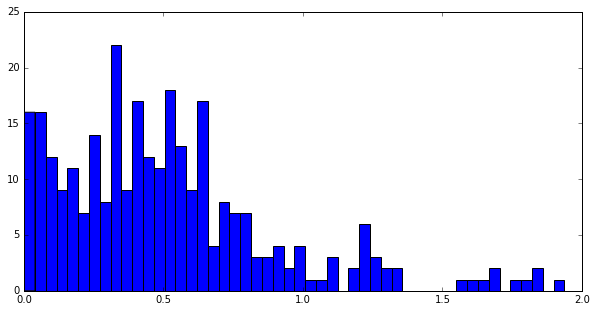

In [65]:
plt.figure(figsize=(10,5))
plt.hist(akaricat.jy[akaricat.jy<2],50)

In [11]:
nbins = 10
lmax = 3000
dtheta_deg = 5./60 # 5arcmin

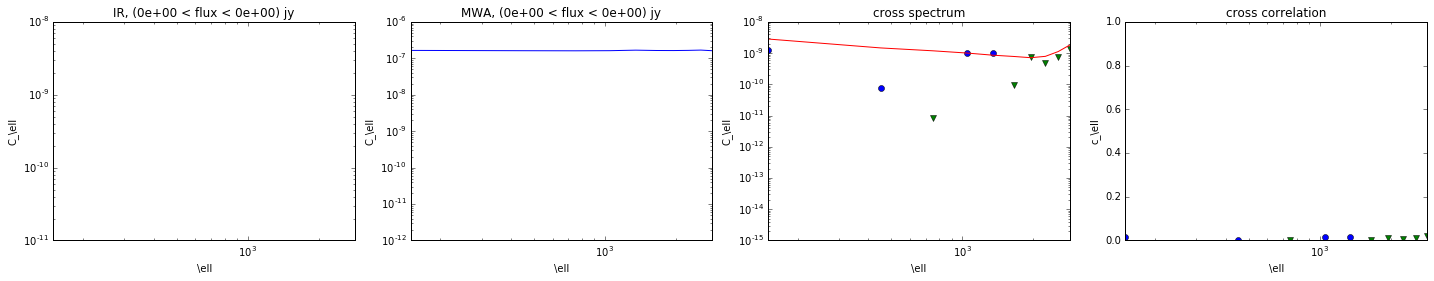

In [12]:
ir_img = cat_utils.cat2img(akaricat,bound_cat=akaricat,dtheta=dtheta_deg,jymin=0,jymax=1.e9)
mwa_img = cat_utils.cat2img(mwa_cat_akari,bound_cat=akaricat,dtheta=dtheta_deg,jymin=0,jymax=1.e9)

lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax)

cat_utils.plot_spectra(plt,lbins,pspec1,pspec2,xspec,bin_counts,[0,0,0,0])

## what about comparing MWA sources to mid IR (WISE) sources?

In [8]:
from astropy.table import Table

In [9]:
t = Table.read('/Volumes/abraham/xcor_data/far_ir_catalogs/wise_allsky.allsky_4band_p3as_psd31177.tbl', format='ipac')

In [10]:
t

designation,ra,dec,w1mpro,w1sigmpro,w2mpro,w2sigmpro,w3mpro,w3sigmpro,w4mpro,w4sigmpro
,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag
str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J232800.04-193926.1,352.000207,-19.6572672,14.562,0.032,14.181,0.049,11.55,0.199,8.846,0.366
J232800.08-200333.8,352.0003452,-20.059394,16.826,0.106,16.409,0.3,12.453,0.441,9.086,--
J232800.43-201619.8,352.0018211,-20.2721741,17.195,0.149,16.408,0.314,12.103,--,9.159,--
J232800.44-201412.0,352.0018738,-20.2366736,16.564,0.09,15.512,0.124,12.405,--,9.197,--
J232800.82-195253.2,352.0034435,-19.8814448,17.542,0.201,16.464,0.316,12.236,--,8.931,--
J232800.84-190710.2,352.0035276,-19.1195056,14.552,0.031,14.28,0.057,10.438,0.078,8.631,0.326
J232801.03-191135.1,352.0043322,-19.1930929,10.55,0.022,10.619,0.02,10.591,0.089,8.68,--
J232801.04-195926.9,352.0043544,-19.9908124,17.603,0.203,16.335,--,12.364,--,9.255,--


In [164]:
ra = t['ra'].data.data
ra[ra>180] -= 360
dec = t['dec'].data.data
w1_mag = t['w1mpro'].data.data
w2_mag = t['w2mpro'].data.data
w3_mag = t['w3mpro'].data.data
w4_mag = t['w4mpro'].data.data
w1_jy = 309.54*10.**(-w1_mag/2.5)*1000 # these numbers are from http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#example
w2_jy = 171.787*10.**(-w2_mag/2.5)*1000
w3_jy = 31.674*10.**(-w3_mag/2.5)*1000
w4_jy = 8.363*10.**(-w4_mag/2.5)*1000

In [184]:
wisecats = [cat_utils.Catalog(ra,dec,w_jy) for w_jy in [w1_jy,w2_jy,w3_jy,w4_jy]]
mwa_cat_wise = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(wisecats[0])

In [10]:
nbins = 10
lmax = 3000
dtheta_deg = 5./60 # 5arcmin

In [194]:
jy_percentile_cuts = [10,90,100]
for bandi in range(4):
    print([np.percentile(wisecats[bandi].jy,jy_percentile_cuts[j]) for j in range(4)])

[0.036434832579821753, 0.069489114621309162, 0.31879887360472031, 309540.0]
[0.031782663912815326, 0.057516214601098153, 0.21706524634595092, 171787.0]
[0.22840358295639143, 0.2955989672344394, 0.47808257216648942, 148423.58333365421]
[1.6472597879408075, 1.9622850575293536, 2.9428091437096726, 66552.151019093799]


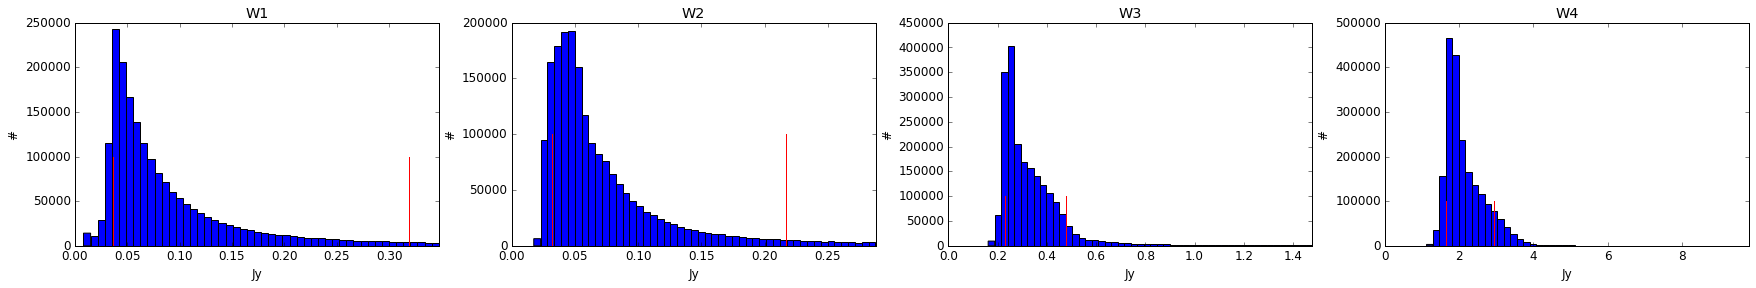

In [241]:
plt.figure(figsize=(30,4))

jy_percentile_cuts = [10,90,100]
for bandi in range(4):
    plt.subplot(1,4,bandi+1)
    plt.hist(wisecats[bandi].jy[wisecats[bandi].jy<5*np.median(wisecats[bandi].jy)],50)
    for j in range(len(jy_percentile_cuts)):
        jymax = np.percentile(wisecats[bandi].jy,jy_percentile_cuts[j])
        plt.plot([jymax,jymax],[0,1.e5],'r')
    plt.xlabel('Jy')
    plt.ylabel('#')
    plt.xlim([0,5*np.median(wisecats[bandi].jy)])
    plt.title('W'+str(bandi+1))
    #plt.ylim([0,6.e3])

In [292]:
# # make flux limited wise images, and save to disk

# jy_percentile_cuts = [95]
# for bandi in range(4):
#     for j in range(len(jy_percentile_cuts)):
#         print('bandi = %d, jymaxpercentile = %d'%(bandi,jy_percentile_cuts[j]))
#         ir_img = cat_utils.cat2img(wisecats[bandi],bound_cat=wisecats[bandi],dtheta=dtheta_deg,jymin=0,jymax=np.percentile(wisecats[bandi].jy,jy_percentile_cuts[j]),verbose=True)
#         np.savez('/volumes/abraham/xcor_data/far_ir_catalogs/w'+str(bandi+1)+'_jymaxpercentile='+str(jy_percentile_cuts[j])+'.npz',ir_img)

In [306]:
# make flux limited wise images, and save to disk

for bandi in range(4):
    print('bandi = %d, jymaxpercentile = %d'%(bandi,jy_percentile_cuts[j]))
    ir_img = cat_utils.cat2img(wisecats[bandi],bound_cat=wisecats[bandi],dtheta=dtheta_deg,jymin=np.percentile(wisecats[bandi].jy,25),jymax=np.percentile(wisecats[bandi].jy,75),verbose=True)
    np.savez('/volumes/abraham/xcor_data/far_ir_catalogs/w'+str(bandi+1)+'_jyminpercentile=25_jymaxpercentile=75.npz',ir_img)

bandi = 0, jymaxpercentile = 100
0.0
0.0292397660819
0.0584795321637
0.0877192982456
0.116959064327
0.146198830409
0.175438596491
0.204678362573
0.233918128655
0.263157894737
0.292397660819
0.321637426901
0.350877192982
0.380116959064
0.409356725146
0.438596491228
0.46783625731
0.497076023392
0.526315789474
0.555555555556
0.584795321637
0.614035087719
0.643274853801
0.672514619883
0.701754385965
0.730994152047
0.760233918129
0.789473684211
0.818713450292
0.847953216374
0.877192982456
0.906432748538
0.93567251462
0.964912280702
0.994152046784
bandi = 1, jymaxpercentile = 100
0.0
0.0292397660819
0.0584795321637
0.0877192982456
0.116959064327
0.146198830409
0.175438596491
0.204678362573
0.233918128655
0.263157894737
0.292397660819
0.321637426901
0.350877192982
0.380116959064
0.409356725146
0.438596491228
0.46783625731
0.497076023392
0.526315789474
0.555555555556
0.584795321637
0.614035087719
0.643274853801


KeyboardInterrupt: 

In [256]:
mwa_percentile_limits = [20,90,100]
[np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[l])) for l in range(len(mwa_percentile_limits))]

[300, 1348, 1497]

In [ ]:
# load flux limited wise images, plot power spectra

nbins = 8

plt.figure(figsize=(12,12))
matplotlib.rcParams.update({'font.size': 12})

jy_percentile_cuts = [10,90,100]

cols = ['r','b','c','y','k','m']
for mwa_percentile_limiti in range(len(mwa_percentile_limits)):
    
    mwa_img = cat_utils.cat2img(mwa_cat_wise,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=0,\
                                jymax=np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))
    
    for bandi in range(4):
        for j in range(len(jy_percentile_cuts)):
            ir_img = np.load('/volumes/abraham/xcor_data/far_ir_catalogs/w'+str(bandi+1)+'_jymaxpercentile='+str(jy_percentile_cuts[j])+'.npz')['arr_0']
            
            lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax,hann=True)
            c = xspec/np.sqrt(pspec1*pspec2)

            plt.subplot(4,len(jy_percentile_cuts),len(jy_percentile_cuts)*bandi+j+1)
            plt.plot(lbins,c,cols[mwa_percentile_limiti]+'.-',label='MWA, < %d %%, %d sources'%(mwa_percentile_limits[mwa_percentile_limiti],\
                                                              np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))))
            plt.xlim([0,np.max(lbins)])
            plt.ylim([-.1,.4])
            if bandi == 3: plt.xlabel('\ell')
            if j == 0: plt.ylabel('correlation')
            plt.title('W%d, < %d %%, %1.1e sources'%(bandi+1,jy_percentile_cuts[j],np.sum(wisecats[bandi].jy<np.percentile(wisecats[bandi].jy,jy_percentile_cuts[j]))))
            plt.plot([0,5000],[0,0],'k-')
            
            if bandi==0 and j==0 and mwa_jy_limiti==2:
                plt.legend(fontsize=10)

plt.tight_layout()

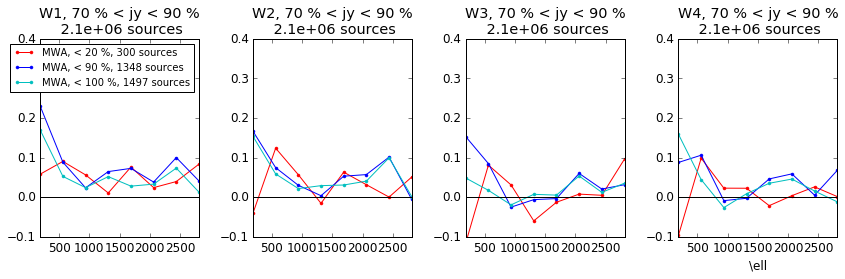

In [305]:
# try a min percentile flux cut too

nbins = 8

plt.figure(figsize=(12,4))
matplotlib.rcParams.update({'font.size': 12})

cols = ['r','b','c','y','k','m']
for mwa_percentile_limiti in range(len(mwa_percentile_limits)):
    
    mwa_img = cat_utils.cat2img(mwa_cat_wise,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=0,\
                                jymax=np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))
    
    for bandi in range(4):
        ir_img = np.load('/volumes/abraham/xcor_data/far_ir_catalogs/w'+str(bandi+1)+'_jyminpercentile=70_jymaxpercentile=90.npz')['arr_0']

        lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax,hann=True)
        c = xspec/np.sqrt(pspec1*pspec2)

        plt.subplot(1,4,1+bandi)
        plt.plot(lbins,c,cols[mwa_percentile_limiti]+'.-',label='MWA, < %d %%, %d sources'%(mwa_percentile_limits[mwa_percentile_limiti],\
                                                          np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))))
        plt.xlim([np.min(lbins),np.max(lbins)])
        plt.ylim([-.1,.4])
        if bandi == 3: plt.xlabel('\ell')
        if j == 0: plt.ylabel('correlation')
        plt.title('W%d, 70 %% < jy < 90 %%\n %1.1e sources'%(bandi+1,np.sum(wisecats[bandi].jy<np.percentile(wisecats[bandi].jy,jy_percentile_cuts[j]))))
        plt.plot([0,5000],[0,0],'k-')

        if bandi==0 and mwa_jy_limiti==2:
            plt.legend(fontsize=10)

plt.tight_layout()

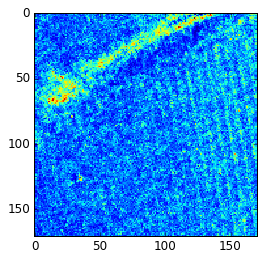

In [303]:
plt.imshow(ir_img,interpolation='nearest')

In [40]:
x = np.random.randn(100,100)
x[x>1] = 0
y = array(x)
y[(y<.5)|(y>2)] = 0

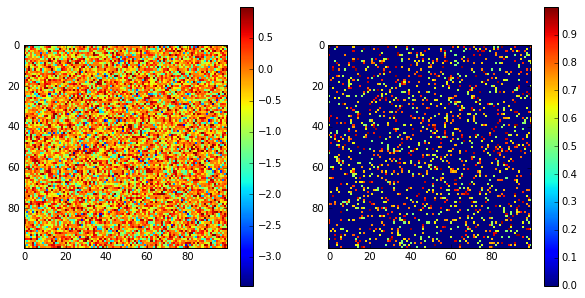

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(x,interpolation='nearest')
plt.colorbar()

plt.subplot(122)
plt.imshow(y,interpolation='nearest')
plt.colorbar()

(-1, 1)

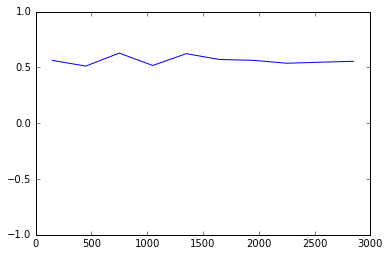

In [42]:

lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(x,y,dtheta_deg,nbins,lmax,hann=True)
c = xspec/np.sqrt(pspec1*pspec2)

plt.plot(lbins,c)
plt.ylim([-1,1])

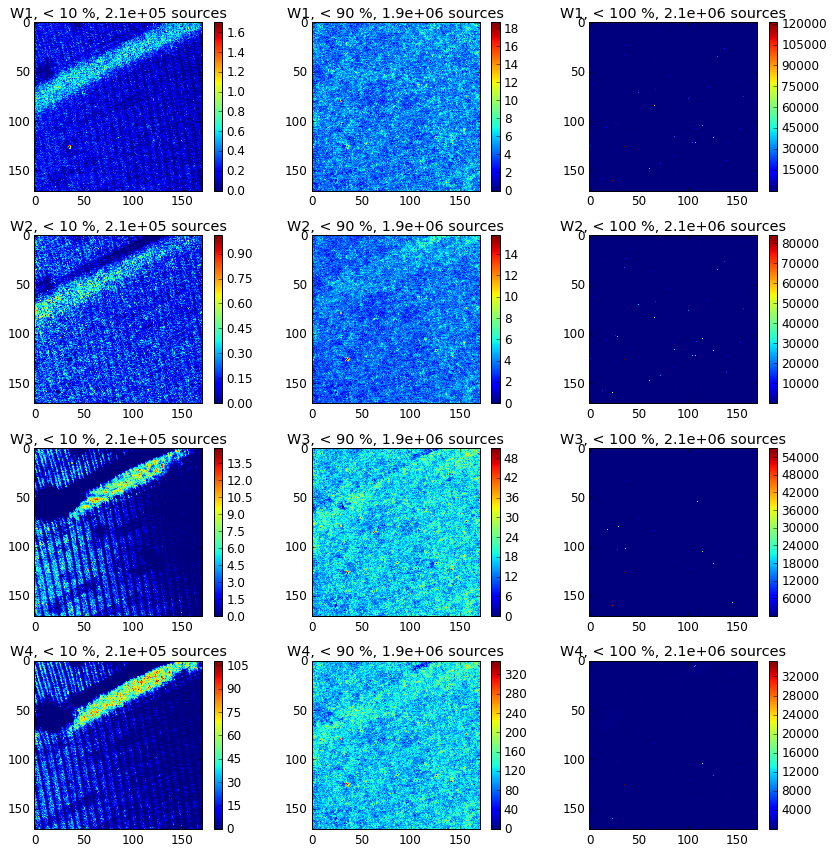

In [260]:
# plot flux limited IR catalog images

nbins = 6

jy_percentile_cuts = [10,90,100]
plt.figure(figsize=(12,12))
for bandi in range(4):
    for j in range(len(jy_percentile_cuts)):
        ir_img = np.load('/volumes/abraham/xcor_data/far_ir_catalogs/w'+str(bandi+1)+'_jymaxpercentile='+str(jy_percentile_cuts[j])+'.npz')['arr_0']

        plt.subplot(4,len(jy_percentile_cuts),len(jy_percentile_cuts)*bandi+j+1)
        plt.imshow(ir_img,interpolation='nearest')
        plt.colorbar()

        plt.title('W%d, < %d %%, %1.1e sources'%(bandi+1,jy_percentile_cuts[j],np.sum(wisecats[bandi].jy<np.percentile(wisecats[bandi].jy,jy_percentile_cuts[j]))))

plt.tight_layout()

mwa jy < 0.17
mwa jy < 1.17
mwa jy < 22.55


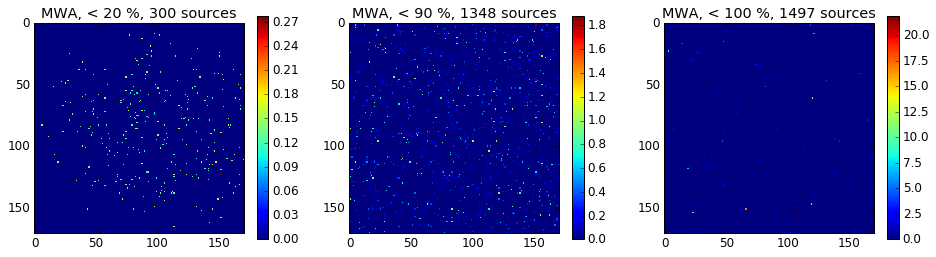

In [259]:
# plot flux limited MWA catalog images
plt.figure(figsize=(16,4))
for mwa_percentile_limiti in range(len(mwa_percentile_limits)):
    mwa_img = cat_utils.cat2img(mwa_cat_wise,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=0,\
                                jymax=np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))
    print('mwa jy < %1.2f'%np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))
    plt.subplot(1,len(mwa_percentile_limits),mwa_percentile_limiti+1)
    plt.imshow(mwa_img,interpolation='nearest')
    plt.colorbar()

    plt.title('MWA, < %d %%, %d sources'%(mwa_percentile_limits[mwa_percentile_limiti],\
                                                          np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))))
